In [ ]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np
import random

In [ ]:
class SocialDynamicsSimulation1:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        #Maybe change this structure to add the subgroup
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 1
        for node in self.graph.nodes:
            #All nodes have opinion 1 to represent true fact
            #Start at 0.5 and introduce truth later
            #See how timing of adding truth affects the model
            self.graph.nodes[node]['opinion'] = np.random.normal(0.5, 0.15)
            self.graph.nodes[node]['persuasiveness'] = np.random.normal(0.025, 0.2)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0
        self.average = 0
        self.sd = 0
        self.persuasiveness = 0.001
        self.avgArr = []
        self.arrSteps = []
        self.data = []
        self.dataSteps = []

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step) + '   Avg Opinion: ' + str(self.average) + "   Opinion SD: " + str(self.sd))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            average = 0
            node = 0
            arr = []
            data = []
            #Select a random edge and update node opinions and edge weight
            #Run and update every node/edge
            for x in self.graph.edges:
                opinions = [self.graph.nodes[n]['opinion'] for n in x]
                persuade = [self.graph.nodes[n]['persuasiveness'] for n in x]
                for i in [0, 1]:
                    #Don't change fake news and fact opinion
                    self.graph.nodes[x[i]]['opinion'] = (
                        #0.5 is the overall persuasiveness of the broadcast
                        opinions[i] + self.alpha * self.persuasiveness * (1 - opinions[i]))
                    average+=opinions[i]
                    arr.append(opinions[i])
                    data.append(opinions[i])
                    node += 1
            self.average = average/node
            self.sd = np.std(arr)
            if(self.step%100 == 0):
                self.avgArr.append(self.average)
                self.arrSteps.append(self.step)
            if(self.step%25 == 0):
                self.data.append(data)
                self.dataSteps.append(self.step)
        self.step += 1

In [ ]:
class SocialDynamicsSimulation2:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        #Maybe change this structure to add the subgroup
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 1
        for node in self.graph.nodes:
            #All nodes have opinion 1 to represent true fact
            #Start at 0.5 and introduce truth later
            #See how timing of adding truth affects the model
            self.graph.nodes[node]['opinion'] = np.random.normal(0.5, 0.15)
            self.graph.nodes[node]['persuasiveness'] = np.random.normal(0.025, 0.2)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0
        self.average = 0
        self.sd = 0
        self.persuasiveness = 0.005
        self.avgArr = []
        self.arrSteps = []
        self.data = []
        self.dataSteps = []

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step) + '   Avg Opinion: ' + str(self.average) + "   Opinion SD: " + str(self.sd))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            average = 0
            node = 0
            arr = []
            data = []
            # Select a random edge and update node opinions and edge weight
            #Run and update every node/edge
            for x in self.graph.edges:
                opinions = [self.graph.nodes[n]['opinion'] for n in x]
                persuade = [self.graph.nodes[n]['persuasiveness'] for n in x]
                for i in [0, 1]:
                    #Don;t change fake news and fact opinion
                    self.graph.nodes[x[i]]['opinion'] = (
                        #0.5 is the overall persuasiveness of the broadcast
                        opinions[i] + self.alpha * self.persuasiveness * (1 - opinions[i]))
                    average+=opinions[i]
                    arr.append(opinions[i])
                    data.append(opinions[i])
                    node += 1
            self.average = average/node
            self.sd = np.std(arr)
            if(self.step%100 == 0):
                self.avgArr.append(self.average)
                self.arrSteps.append(self.step)
            if(self.step%25 == 0):
                self.data.append(data)
                self.dataSteps.append(self.step)
        self.step += 1

#Make persuasiveness a parameter(start with 0.001, then 0.005, 0.01, 0.05, 0.1)
#Draw graph and plot opinion mean and SD

In [ ]:
class SocialDynamicsSimulation3:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        #Maybe change this structure to add the subgroup
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 1
        for node in self.graph.nodes:
            #All nodes have opinion 1 to represent true fact
            #Start at 0.5 and introduce truth later
            #See how timing of adding truth affects the model
            self.graph.nodes[node]['opinion'] = np.random.normal(0.5, 0.15)
            self.graph.nodes[node]['persuasiveness'] = np.random.normal(0.025, 0.2)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0
        self.average = 0
        self.sd = 0
        self.persuasiveness = 0.01
        self.avgArr = []
        self.arrSteps = []
        self.data = []
        self.dataSteps = []

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step) + '   Avg Opinion: ' + str(self.average) + "   Opinion SD: " + str(self.sd))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            average = 0
            node = 0
            arr = []
            data = []
            # Select a random edge and update node opinions and edge weight
            #Run and update every node/edge
            for x in self.graph.edges:
                opinions = [self.graph.nodes[n]['opinion'] for n in x]
                persuade = [self.graph.nodes[n]['persuasiveness'] for n in x]
                for i in [0, 1]:
                    #Don;t change fake news and fact opinion
                    self.graph.nodes[x[i]]['opinion'] = (
                        #0.5 is the overall persuasiveness of the broadcast
                        opinions[i] + self.alpha * self.persuasiveness * (1 - opinions[i]))
                    average+=opinions[i]
                    arr.append(opinions[i])
                    data.append(opinions[i])
                    node += 1
            self.average = average/node
            self.sd = np.std(arr)
            if(self.step%100 == 0):
                self.avgArr.append(self.average)
                self.arrSteps.append(self.step)
            if(self.step%25 == 0):
                self.data.append(data)
                self.dataSteps.append(self.step)
        self.step += 1

#Make persuasiveness a parameter(start with 0.001, then 0.005, 0.01, 0.05, 0.1)
#Draw graph and plot opinion mean and SD

In [ ]:
class SocialDynamicsSimulation4:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        #Maybe change this structure to add the subgroup
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 1
        for node in self.graph.nodes:
            #All nodes have opinion 1 to represent true fact
            #Start at 0.5 and introduce truth later
            #See how timing of adding truth affects the model
            self.graph.nodes[node]['opinion'] = np.random.normal(0.5, 0.15)
            self.graph.nodes[node]['persuasiveness'] = np.random.normal(0.025, 0.2)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0
        self.average = 0
        self.sd = 0
        self.persuasiveness = 0.05
        self.avgArr = []
        self.arrSteps = []
        self.data = []
        self.dataSteps = []

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step) + '   Avg Opinion: ' + str(self.average) + "   Opinion SD: " + str(self.sd))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            average = 0
            node = 0
            arr = []
            data = []
            # Select a random edge and update node opinions and edge weight
            #Run and update every node/edge
            for x in self.graph.edges:
                opinions = [self.graph.nodes[n]['opinion'] for n in x]
                persuade = [self.graph.nodes[n]['persuasiveness'] for n in x]
                for i in [0, 1]:
                    #Don;t change fake news and fact opinion
                    self.graph.nodes[x[i]]['opinion'] = (
                        #0.5 is the overall persuasiveness of the broadcast
                        opinions[i] + self.alpha * self.persuasiveness * (1 - opinions[i]))
                    average+=opinions[i]
                    arr.append(opinions[i])
                    data.append(opinions[i])
                    node += 1
            self.average = average/node
            self.sd = np.std(arr)
            if(self.step%100 == 0):
                self.avgArr.append(self.average)
                self.arrSteps.append(self.step)
            if(self.step%25 == 0):
                self.data.append(data)
                self.dataSteps.append(self.step)
        self.step += 1

#Make persuasiveness a parameter(start with 0.001, then 0.005, 0.01, 0.05, 0.1)
#Draw graph and plot opinion mean and SD

In [ ]:
class SocialDynamicsSimulation5:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        #Maybe change this structure to add the subgroup
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 1
        for node in self.graph.nodes:
            #All nodes have opinion 1 to represent true fact
            #Start at 0.5 and introduce truth later
            #See how timing of adding truth affects the model
            self.graph.nodes[node]['opinion'] = np.random.normal(0.5, 0.15)
            self.graph.nodes[node]['persuasiveness'] = np.random.normal(0.025, 0.2)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0
        self.average = 0
        self.sd = 0
        self.persuasiveness = 0.1
        self.avgArr = []
        self.arrSteps = []
        self.data = []
        self.dataSteps = []

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step) + '   Avg Opinion: ' + str(self.average) + "   Opinion SD: " + str(self.sd))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            average = 0
            node = 0
            arr = []
            data = []
            # Select a random edge and update node opinions and edge weight
            #Run and update every node/edge
            for x in self.graph.edges:
                opinions = [self.graph.nodes[n]['opinion'] for n in x]
                persuade = [self.graph.nodes[n]['persuasiveness'] for n in x]
                for i in [0, 1]:
                    #Don;t change fake news and fact opinion
                    self.graph.nodes[x[i]]['opinion'] = (
                        #0.5 is the overall persuasiveness of the broadcast
                        opinions[i] + self.alpha * self.persuasiveness * (1 - opinions[i]))
                    average+=opinions[i]
                    arr.append(opinions[i])
                    data.append(opinions[i])
                    node += 1
            self.average = average/node
            self.sd = np.std(arr)
            if(self.step%100 == 0):
                self.avgArr.append(self.average)
                self.arrSteps.append(self.step)
            if(self.step%25 == 0):
                self.data.append(data)
                self.dataSteps.append(self.step)
        self.step += 1

#Make persuasiveness a parameter(start with 0.001, then 0.005, 0.01, 0.05, 0.1)
#Draw graph and plot opinion mean and SD

In [ ]:
sim1 = SocialDynamicsSimulation1()
sim2 = SocialDynamicsSimulation2()
sim3 = SocialDynamicsSimulation3()
sim4 = SocialDynamicsSimulation4()
sim5 = SocialDynamicsSimulation5()
sim1.initialize()
sim2.initialize()
sim3.initialize()
sim4.initialize()
sim5.initialize()
import pandas as pd
avgP=[]
mean=[]
avgP2=[]
mean2=[]
avgP3=[]
mean3=[]
avgP4=[]
mean4=[]
avgP5=[]
mean5=[]
lowIndex=[]
highIndex=[]
lowIndex2=[]
highIndex2=[]
lowIndex3=[]
highIndex3=[]
lowIndex4=[]
highIndex4=[]
lowIndex5=[]
highIndex5=[]

for i in range(100):
    for j in range(10):
        for k in range(100):
            sim1.update()
            sim2.update()
            sim3.update()
            sim4.update()
            sim5.update()
    avgP.append(sim1.avgArr)
    avgP2.append(sim2.avgArr)
    avgP3.append(sim3.avgArr)
    avgP4.append(sim4.avgArr)
    avgP5.append(sim5.avgArr)
    sim1.initialize()
    sim2.initialize()
    sim3.initialize()
    sim4.initialize()
    sim5.initialize()
    
#convert avgP (python list) into pandas dataframe (library)
df = pd.DataFrame(avgP, columns = ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000'])
df2 = pd.DataFrame(avgP2, columns = ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000'])
df3 = pd.DataFrame(avgP3, columns = ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000'])
df4 = pd.DataFrame(avgP4, columns = ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000'])
df5 = pd.DataFrame(avgP5, columns = ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000'])
#use pandas' to_csv function to write the dataframe into a csv file
for i in ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000']:
    mean.append(df[i].mean())
    mean2.append(df2[i].mean())
    mean3.append(df3[i].mean())
    mean4.append(df4[i].mean())
    mean5.append(df5[i].mean())
    lowIndex.append(df[i].quantile(0.025))
    highIndex.append(df[i].quantile(0.975))
    lowIndex2.append(df2[i].quantile(0.025))
    highIndex2.append(df2[i].quantile(0.975))
    lowIndex3.append(df3[i].quantile(0.025))
    highIndex3.append(df3[i].quantile(0.975))
    lowIndex4.append(df4[i].quantile(0.025))
    highIndex4.append(df4[i].quantile(0.975))
    lowIndex5.append(df5[i].quantile(0.025))
    highIndex5.append(df5[i].quantile(0.975))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv('/content/drive/MyDrive/Exp2_1_csv_file.csv')
df2.to_csv('/content/drive/MyDrive/Exp2_2_csv_file.csv')
df3.to_csv('/content/drive/MyDrive/Exp2_3_csv_file.csv')
df4.to_csv('/content/drive/MyDrive/Exp2_4_csv_file.csv')
df5.to_csv('/content/drive/MyDrive/Exp2_5_csv_file.csv')
mean=[]
mean2=[]
mean3=[]
mean4=[]
mean5=[]
lowIndex=[]
highIndex=[]
lowIndex2=[]
highIndex2=[]
lowIndex3=[]
highIndex3=[]
lowIndex4=[]
highIndex4=[]
highIndex5=[]
lowIndex5=[]
for i in ['Steps 100','Steps 200','Steps 300','Steps 400','Steps 500','Steps 600','Steps 700','Steps 800','Steps 900','Steps 1000']:
    mean.append(df[i].mean())
    mean2.append(df2[i].mean())
    mean3.append(df3[i].mean())
    mean4.append(df4[i].mean())
    mean5.append(df5[i].mean())
    lowIndex.append(df[i].quantile(0.025))
    highIndex.append(df[i].quantile(0.975))
    lowIndex2.append(df2[i].quantile(0.025))
    highIndex2.append(df2[i].quantile(0.975))
    lowIndex3.append(df3[i].quantile(0.025))
    highIndex3.append(df3[i].quantile(0.975))
    lowIndex4.append(df4[i].quantile(0.025))
    highIndex4.append(df4[i].quantile(0.975))
    lowIndex5.append(df5[i].quantile(0.025))
    highIndex5.append(df5[i].quantile(0.975))

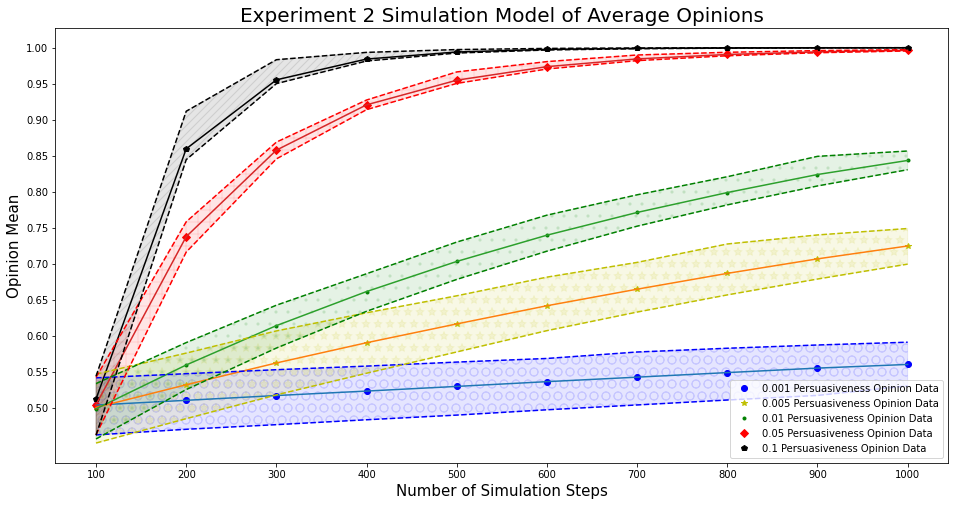

0.001 Persuasiveness Area = 4.7931631943636415
0.005 Persuasiveness Area = 5.611720897268029
0.01 Persuasiveness Area = 6.341369387699687
0.05 Persuasiveness Area = 8.163329551897265
0.1 Persuasiveness Area = 8.544656007146935


In [ ]:
plt.figure(figsize=(16,8))
plt.title("Experiment 2 Simulation Model of Average Opinions", fontsize=20)
plt.xlabel("Number of Simulation Steps", fontsize=15)
plt.ylabel("Opinion Mean", fontsize=15)
plt.yticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1])
plt.xticks([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], mean, 'bo', marker='o')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], mean2, 'yo', marker='*')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], mean3, 'go', marker='.')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], mean4, 'ro', marker='D')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], mean5, 'ko', marker='p')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], mean)
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], mean2)
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], mean3)
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], mean4)
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], mean5,'k')



plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], highIndex,'b--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], lowIndex,'b--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], highIndex2,'y--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], lowIndex2,'y--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], highIndex3,'g--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], lowIndex3,'g--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], highIndex4,'r--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], lowIndex4,'r--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], highIndex5,'k--')
plt.plot([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], lowIndex5,'k--')

l=np.array(lowIndex)
h=np.array(highIndex)
l2=np.array(lowIndex2)
h2=np.array(highIndex2)
l3=np.array(lowIndex3)
h3=np.array(highIndex3)
l4=np.array(lowIndex4)
h4=np.array(highIndex4)
l5=np.array(lowIndex5)
h5=np.array(highIndex5)
plt.fill_between([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], l, h, color='b', hatch='O', alpha=.1)
plt.fill_between([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], l2, h2, color='y', hatch='*', alpha=.1)
plt.fill_between([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], l3, h3, color='g', hatch='.', alpha=.1)
plt.fill_between([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], l4, h4, color='r', hatch='+', alpha=.1)
plt.fill_between([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], l5, h5, color='k', hatch='///', alpha=.1)

plt.legend(["0.001 Persuasiveness Opinion Data", "0.005 Persuasiveness Opinion Data", "0.01 Persuasiveness Opinion Data", "0.05 Persuasiveness Opinion Data", "0.1 Persuasiveness Opinion Data"])
plt.show()

area = np.trapz(mean)
print("0.001 Persuasiveness Area =", area)
area = np.trapz(mean2)
print("0.005 Persuasiveness Area =", area)
area = np.trapz(mean3)
print("0.01 Persuasiveness Area =", area)
area = np.trapz(mean4)
print("0.05 Persuasiveness Area =", area)
area = np.trapz(mean5)
print("0.1 Persuasiveness Area =", area)